# Homework : Week 1
### José Moran

In [1]:
%pylab inline

import numpy as np 
import random
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Part 1

In [2]:
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
           x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

In [3]:
n_runs = 1000
delta = 0.1

We create a function to calculate the average value obtained for pi in the simulation, as well as the average of the square value obtained, so that we can get the variance on our simulation of fixed length n_runs.

In [4]:
def average_values(n_trials, delta=0.1, n_runs=1000):
    values = np.zeros(n_runs)
    sqvals = np.zeros(n_runs)
    for run in xrange(n_runs):
        values[run] = 4.0 * markov_pi(n_trials, delta) /float(n_trials)
        sqvals[run] = values[run]**2
    avg = sum(values)/n_runs
    sqavg = sum(sqvals)/n_runs
    return avg, sqavg

### 1.1
We then proceed to calculate the average value obtained for $\pi$ with increasing values of n_trials, calculating the variance as well. 

In [5]:
trials = [500, 1000, 2000, 10000, 15000, 20000]

In [6]:
for n_trials in trials:
    avg, sqavg = average_values(n_trials)
    print "Average value for %d trials : %f with variance %f" % (n_trials, avg, np.sqrt(sqavg-avg**2))

Average value for 500 trials : 2.737592 with variance 0.606141
Average value for 1000 trials : 2.946552 with variance 0.427657
Average value for 2000 trials : 3.020210 with variance 0.300666
Average value for 10000 trials : 3.120201 with variance 0.141557
Average value for 15000 trials : 3.127857 with variance 0.116444
Average value for 20000 trials : 3.133197 with variance 0.099964


The value seems to approach $\pi$, we get a close enough value for $2\cdot 10^4$ trials and we get an increasingly small variance, implying that our algorithm converges. 

We now will calculate the acceptance ratio and see how it varies with the length of the Monte-Carlo step $\Delta$.

In [17]:
def markov_pi2(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0 
    n_acc = 0
    for i in xrange(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x+del_x) < 1.0 and abs(y+del_y) < 1.0:
            x, y = x+del_x, y+del_y
            n_acc+=1
        if x**2+y**2<1.0: n_hits += 1
    return n_hits, n_acc/float(N)
    

In [18]:
deltas = np.arange(0.1, 5.1, 0.1)

In [20]:
ratios = []
n_runs = 500
n_trials = 1000
for delta in deltas:
    accept = np.zeros(n_runs)
    for run in xrange(n_runs):
        n_hits, acc = markov_pi2(n_trials,delta)
        accept[run]=acc
    ratios.append(sum(accept)/float(n_runs))

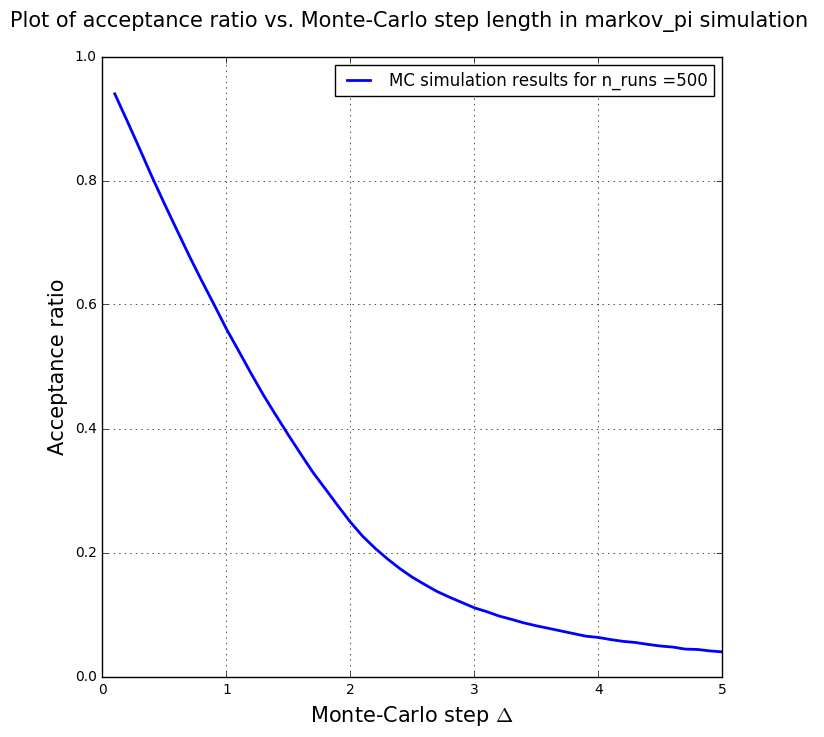

In [21]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,ratios, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Acceptance ratio", fontsize=15)
plt.title("Plot of acceptance ratio vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

To find the optimal value that gets us an acceptance ratio of 0.5, we zoom into the area in the following plot.

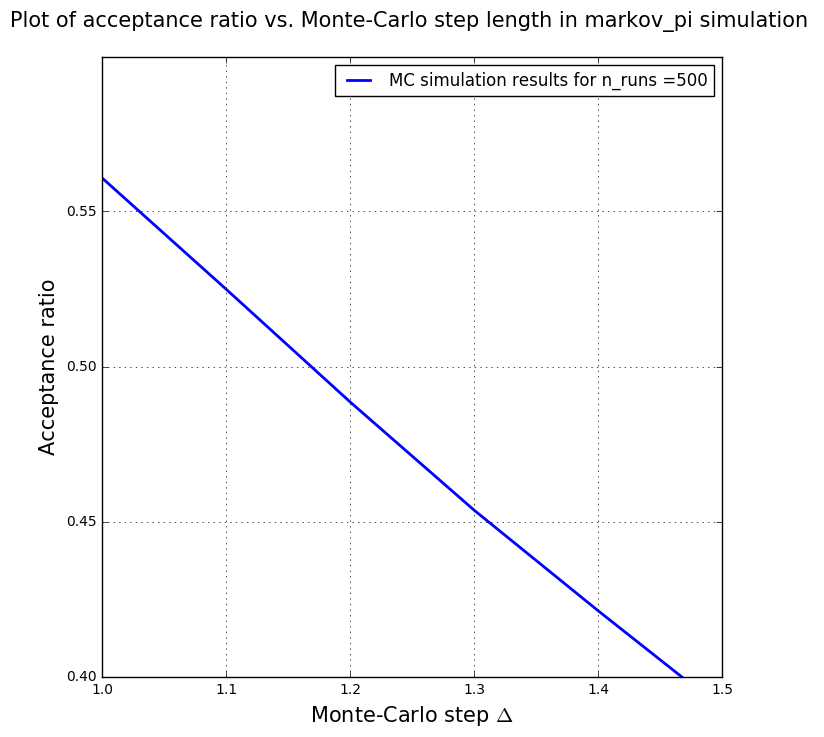

In [23]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,ratios, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
ymin, ymax = 0.4, 0.6
xmin, xmax = 1,1.5
plt.axis([xmin,xmax,ymin,ymax])
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Acceptance ratio", fontsize=15)
plt.title("Plot of acceptance ratio vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

### 1.2
The interval is therefore $[1.15,1.25]$

### 1.3
Let us now see how the standard deviation varies with $\Delta$.

In [24]:
std_dev = []
n_runs = 500
n_trials = 1000
for delta in deltas:
    sqvalues = np.zeros(n_runs)
    values = np.zeros(n_runs)
    for run in xrange(n_runs):
        n_hits, acc = markov_pi2(n_trials,delta)
        values[run] = 4.0 * markov_pi(n_trials, delta) /float(n_trials)
        sqvalues[run] = values[run]**2
    std_dev.append(np.sqrt(sum(sqvalues)/float(n_runs)-(sum(values)/float(n_runs))**2))

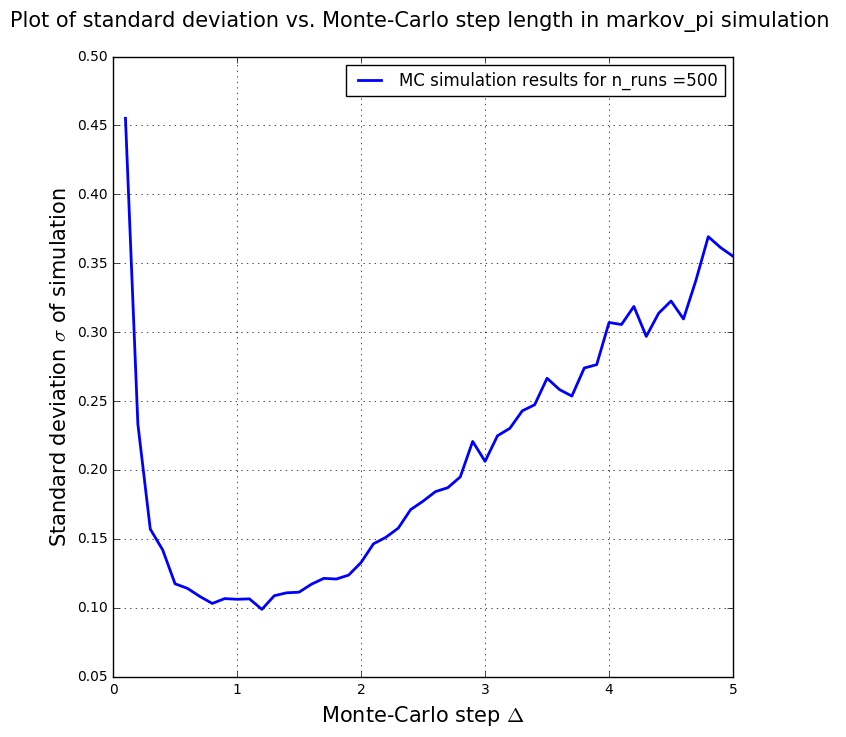

In [25]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,std_dev, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Standard deviation $\sigma$ of simulation", fontsize=15)
plt.title("Plot of standard deviation vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

We can therefore see that the standard deviation has a minimum around $\Delta=1$. **This seems show that our rule of thumb of choosing an acceptance ratio of 0.5 is valid**.